In [1]:
import networkx as nx
from utils import get_graph, get_weight_stats, plot_weight_stats, plot_communities, naive_sequence, plot_sequence_errors

In [2]:
books = [
    "Cain's Jawbone",
    "Alice's Adventures in Wonderland",
    "Animal Farm",
    "Cloud Atlas",
    "If on a winter's night a traveler",
    "Of Mice and Men",
    "The Alchemist",
    "The Big Sleep",
    "The Maltese Falcon",
    "The Metamorphosis",
    "The Murder of Roger Ackroyd",
    "The Nine Tailors",
    "The Sound and the Fury",
    "The Strange Case of Dr. Jekyll and Mr. Hyde",
]

graphs = [get_graph(book) for book in books]

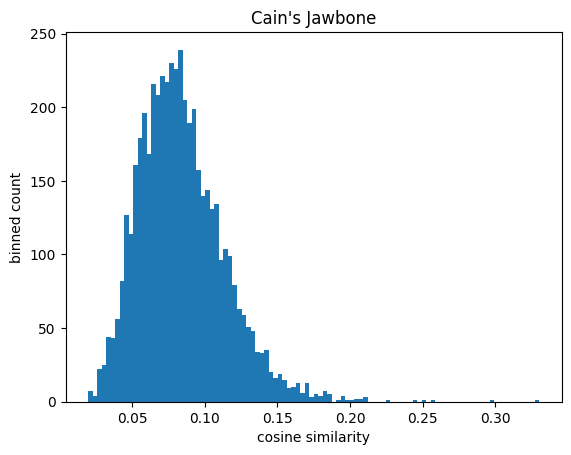

minimum 0.020
mean    0.084 +- 0.030
maximum 0.330



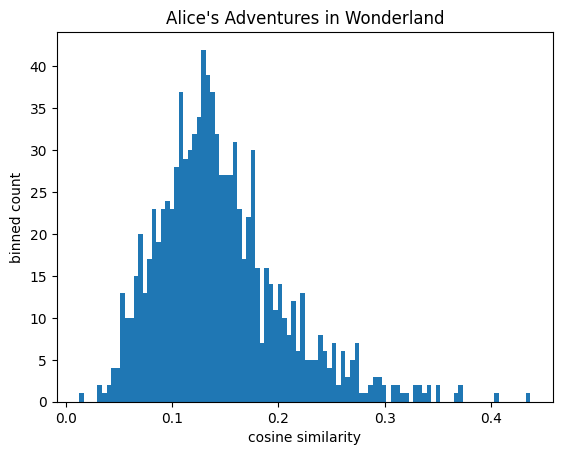

minimum 0.013
mean    0.145 +- 0.060
maximum 0.437



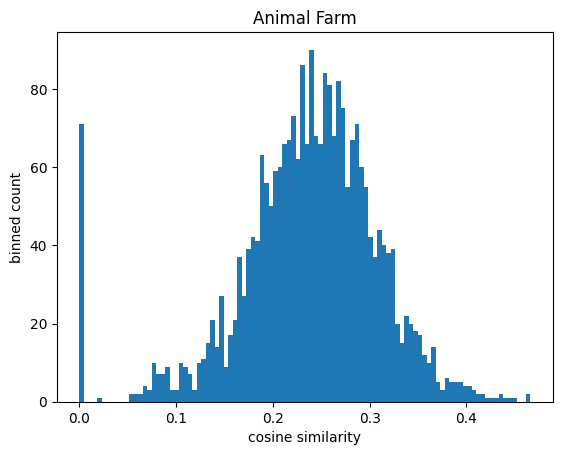

minimum 0.000
mean    0.237 +- 0.074
maximum 0.466



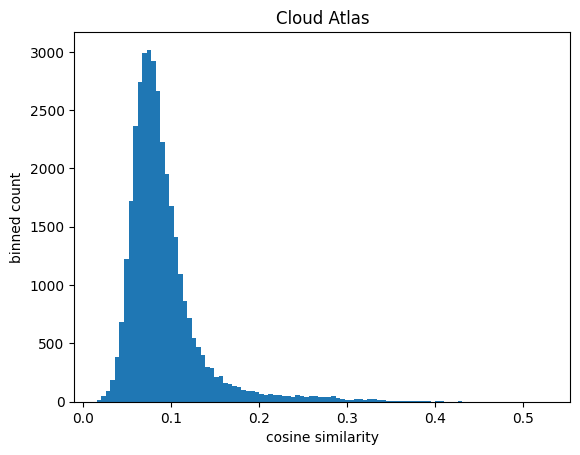

minimum 0.016
mean    0.091 +- 0.043
maximum 0.528



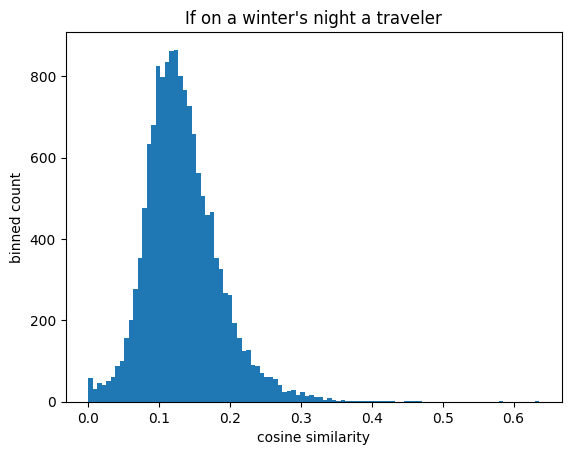

minimum 0.000
mean    0.133 +- 0.052
maximum 0.636



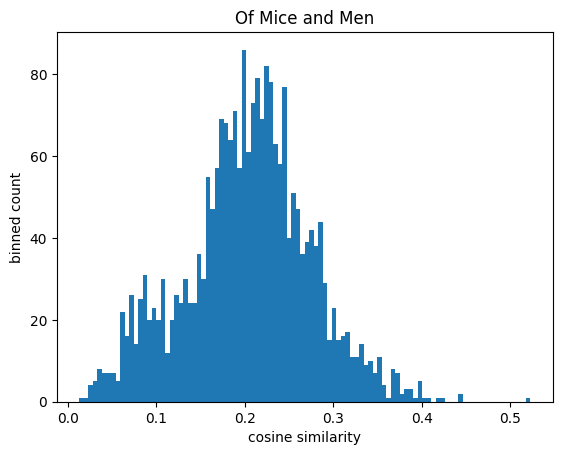

minimum 0.013
mean    0.204 +- 0.071
maximum 0.522



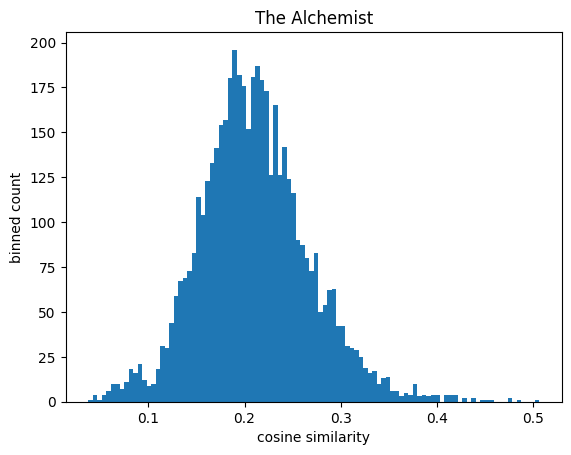

minimum 0.037
mean    0.211 +- 0.058
maximum 0.506



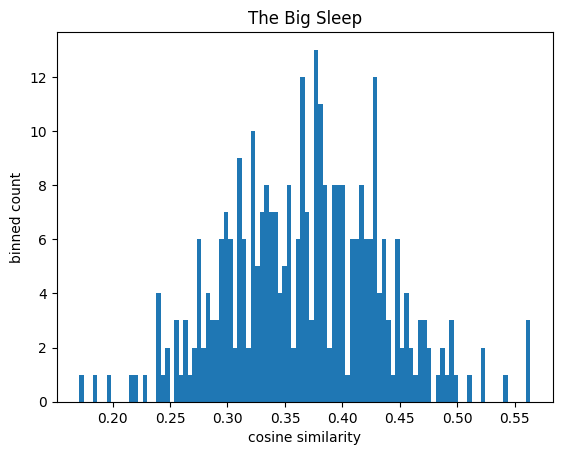

minimum 0.171
mean    0.368 +- 0.068
maximum 0.563



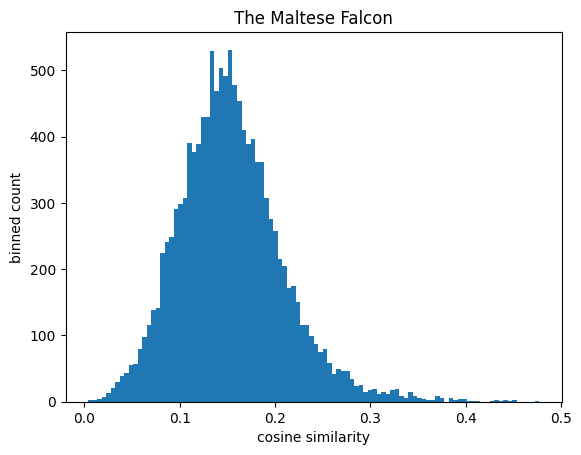

minimum 0.004
mean    0.154 +- 0.055
maximum 0.477



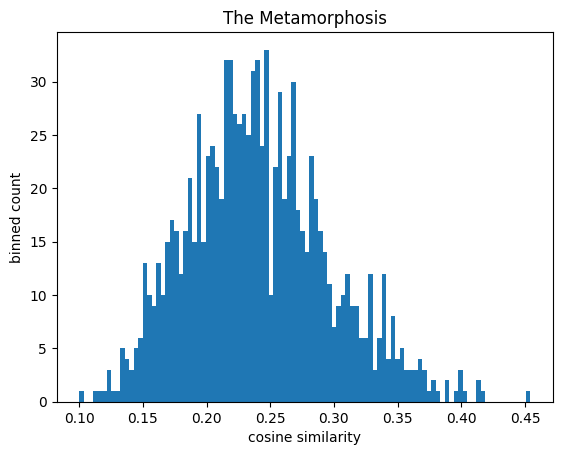

minimum 0.100
mean    0.241 +- 0.056
maximum 0.454



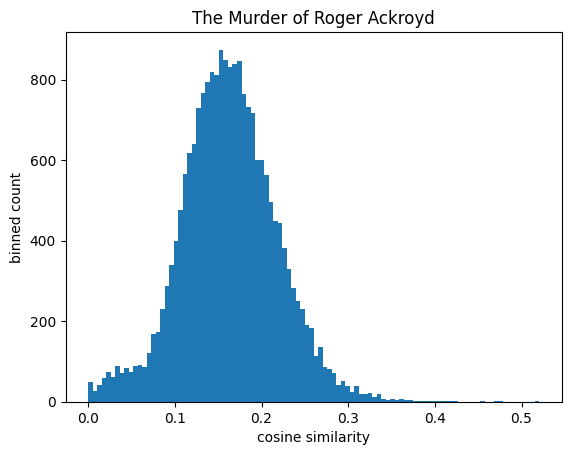

minimum 0.000
mean    0.163 +- 0.055
maximum 0.520



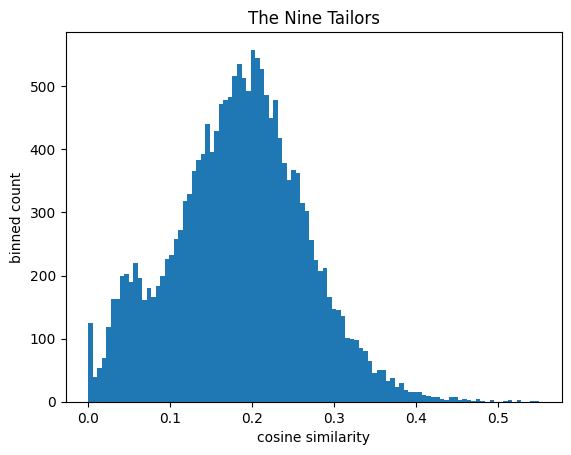

minimum 0.000
mean    0.184 +- 0.081
maximum 0.550



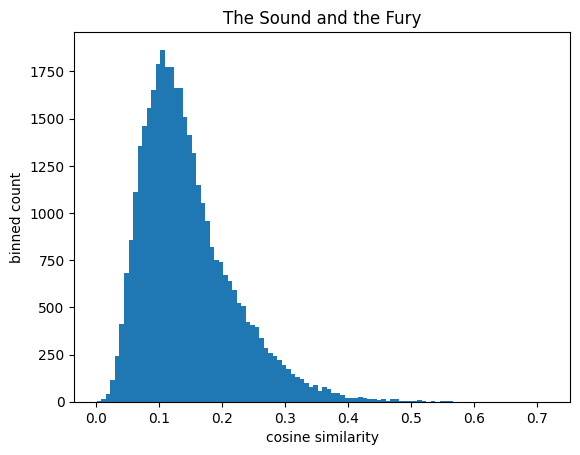

minimum 0.002
mean    0.146 +- 0.073
maximum 0.718



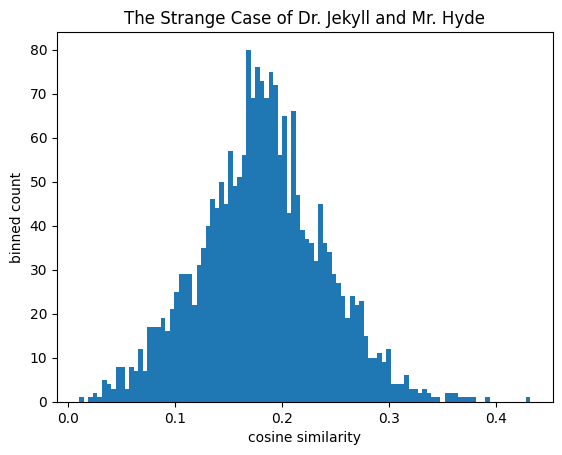

minimum 0.011
mean    0.182 +- 0.059
maximum 0.432



In [3]:
for book, graph in zip(books, graphs):
    plot_weight_stats(graph, book)
    stats = get_weight_stats(graph)
    print(f"minimum {stats.min():0.3f}")
    print(f"mean    {stats.mean():0.3f} +- {stats.std():0.3f}")
    print(f"maximum {stats.max():0.3f}")
    print("")

In [4]:
all_communities = [nx.community.louvain_communities(graph, weight="weight", resolution=1, seed=0) for graph in graphs]

narratives = {
    "Cain's Jawbone" : 6,
    "Alice's Adventures in Wonderland" : 1,
    "Animal Farm" : 1,
    "Cloud Atlas" : 6,
    "If on a winter's night a traveler" : 10,
    "Of Mice and Men" : 1,
    "The Alchemist" : 1,
    "The Big Sleep" : 1,
    "The Maltese Falcon" : 1,
    "The Metamorphosis" : 1,
    "The Murder of Roger Ackroyd" : 1,
    "The Nine Tailors" : 1,
    "The Sound and the Fury" : 4,
    "The Strange Case of Dr. Jekyll and Mr. Hyde" : 1,
}

print("expected | predicted | book")
for book, communities in zip(books, all_communities):
    print(f"{narratives[book]:8d} | {len(communities):9d} | {book}")

expected | predicted | book
       6 |         3 | Cain's Jawbone
       1 |         3 | Alice's Adventures in Wonderland
       1 |         4 | Animal Farm
       6 |         5 | Cloud Atlas
      10 |         3 | If on a winter's night a traveler
       1 |         3 | Of Mice and Men
       1 |         3 | The Alchemist
       1 |         2 | The Big Sleep
       1 |         4 | The Maltese Falcon
       1 |         3 | The Metamorphosis
       1 |         4 | The Murder of Roger Ackroyd
       1 |         3 | The Nine Tailors
       4 |         3 | The Sound and the Fury
       1 |         2 | The Strange Case of Dr. Jekyll and Mr. Hyde


c:\Users\maxst\Repos\Graph-Algorithms-Project\.venv\Lib\site-packages\netgraph\_utils.py:360: RuntimeWarning: invalid value encountered in divide
  v = v / np.linalg.norm(v, axis=-1)[:, None] # unit vector


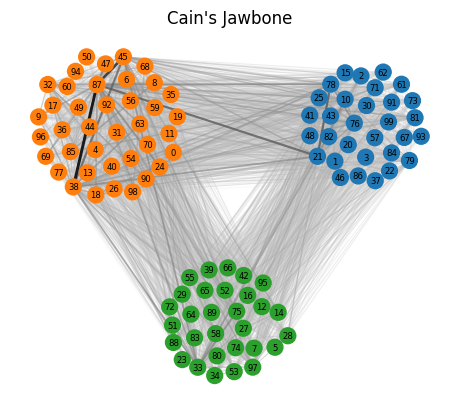

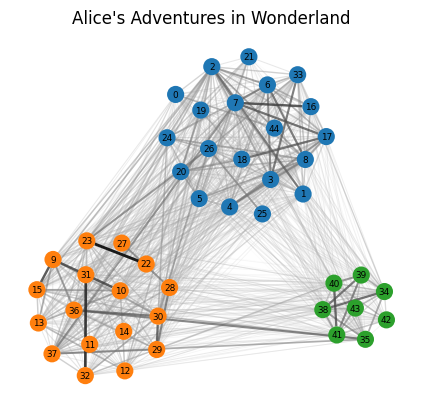

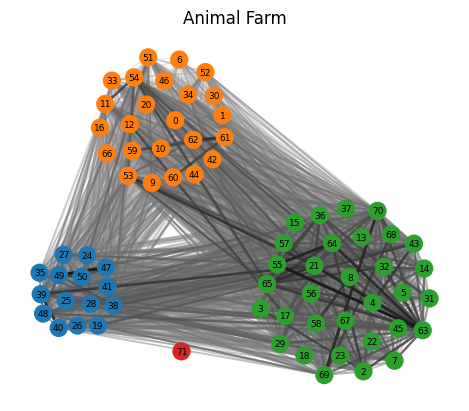

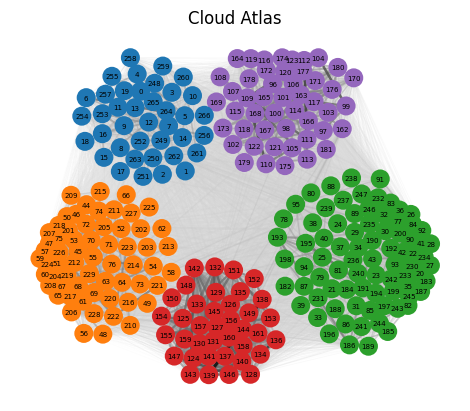

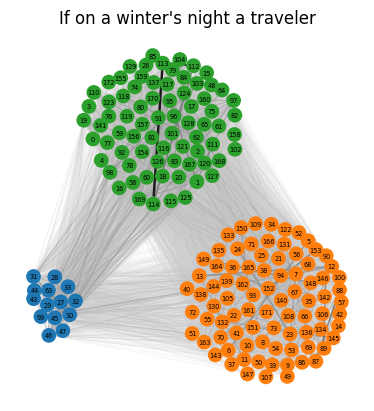

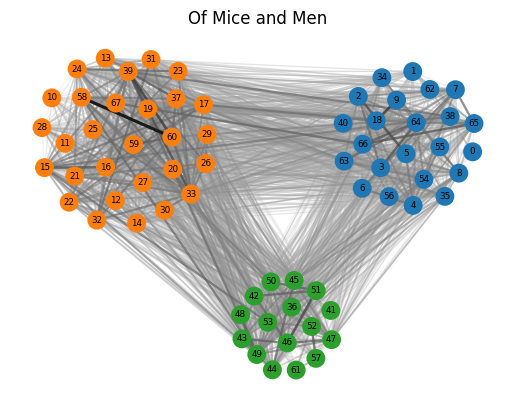

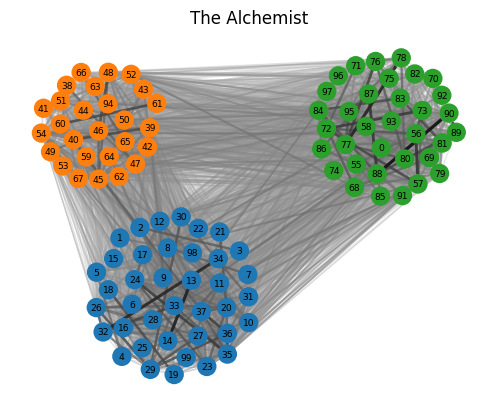

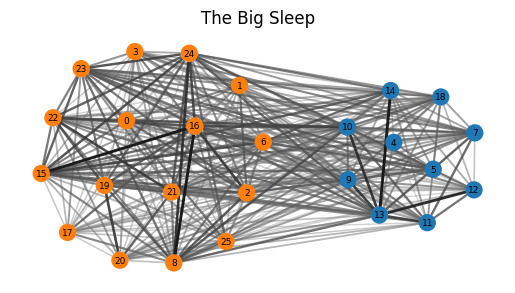

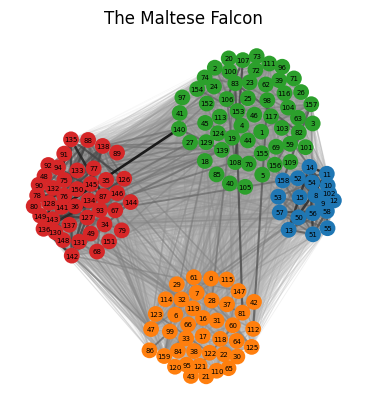

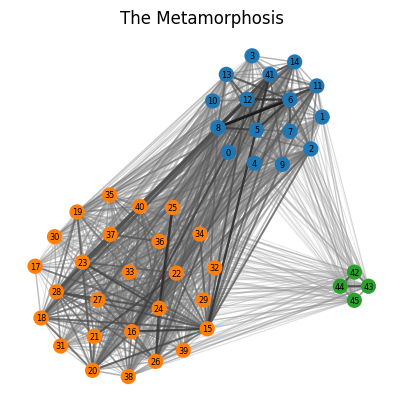

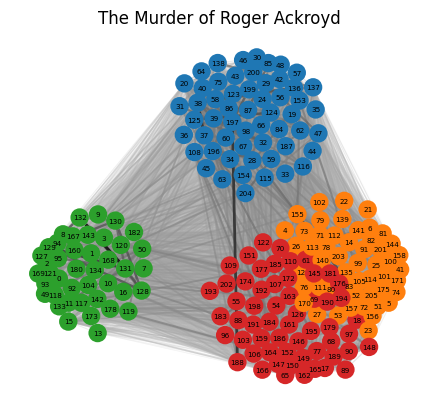

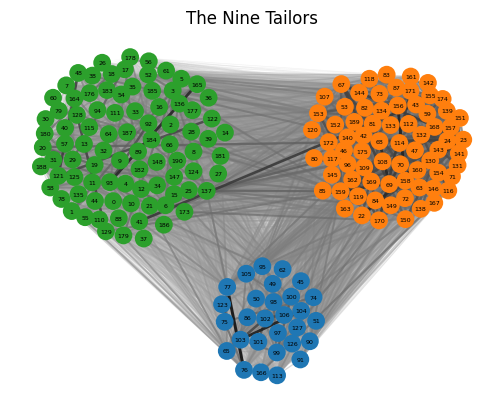

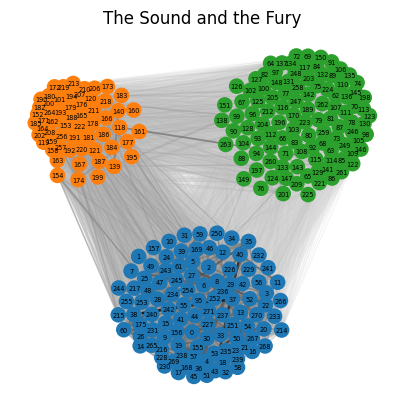

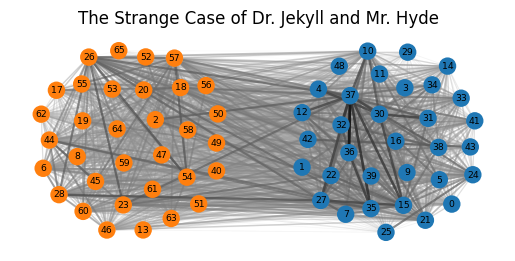

In [5]:
# WARNING: this runs for more than 20 minutes!
for book, graph, communities in zip(books, graphs, all_communities):
    plot_communities(graph, communities, book)

In [6]:
sequences = [naive_sequence(graph, 0) for graph in graphs]

for book, sequence in zip(books, sequences):
    print(book)
    print(*sequence, sep=", ")
    print("")

Cain's Jawbone
0, 88, 45, 87, 38, 33, 75, 27, 32, 90, 58, 85, 8, 24, 99, 76, 78, 21, 10, 71, 61, 2, 97, 1, 53, 63, 18, 31, 86, 79, 52, 25, 91, 95, 65, 39, 28, 34, 74, 35, 69, 49, 14, 46, 41, 12, 57, 48, 68, 98, 36, 55, 84, 81, 16, 42, 47, 13, 9, 17, 92, 40, 11, 73, 44, 77, 80, 23, 82, 67, 4, 7, 66, 54, 22, 5, 70, 19, 59, 94, 6, 26, 3, 20, 30, 89, 64, 51, 56, 96, 62, 43, 93, 15, 60, 72, 29, 37, 83, 50

Alice's Adventures in Wonderland
0, 44, 26, 23, 22, 24, 8, 6, 3, 33, 1, 2, 7, 16, 17, 18, 20, 19, 37, 29, 30, 36, 35, 38, 34, 39, 41, 40, 42, 43, 32, 31, 11, 9, 15, 10, 13, 12, 4, 5, 21, 28, 27, 14, 25

Animal Farm
0, 1, 59, 61, 62, 53, 21, 63, 55, 64, 65, 32, 36, 29, 56, 70, 69, 68, 43, 4, 2, 3, 13, 14, 58, 8, 7, 39, 40, 27, 28, 25, 23, 38, 49, 47, 50, 51, 20, 9, 10, 42, 34, 48, 57, 45, 37, 54, 11, 12, 17, 15, 31, 19, 18, 67, 33, 16, 66, 26, 41, 35, 24, 52, 30, 60, 22, 44, 6, 5, 46, 71

Cloud Atlas
0, 263, 262, 10, 7, 16, 12, 15, 14, 264, 265, 257, 248, 249, 250, 255, 254, 253, 256, 252,

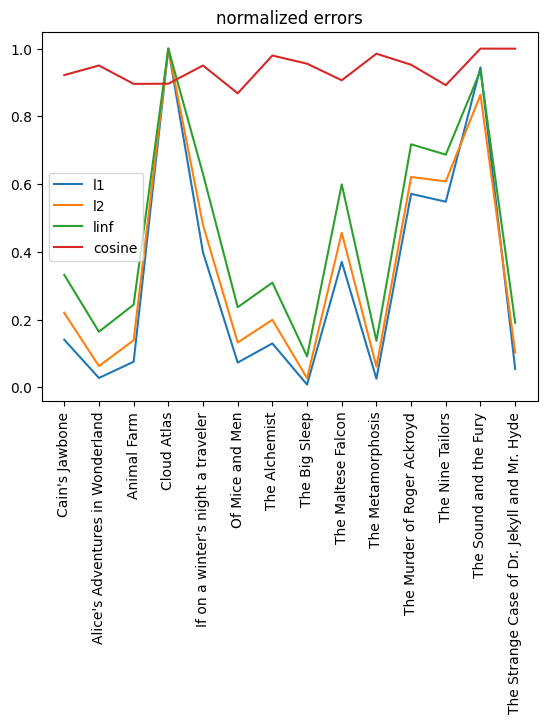

In [7]:
plot_sequence_errors(books, sequences)